### Boston House

In [1]:
from tensorflow.keras import models, layers
from tensorflow.keras import callbacks

In [2]:
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

print(len(train_data))
print(len(test_data))

404
102


In [3]:
train_data

array([[1.23247e+00, 0.00000e+00, 8.14000e+00, ..., 2.10000e+01,
        3.96900e+02, 1.87200e+01],
       [2.17700e-02, 8.25000e+01, 2.03000e+00, ..., 1.47000e+01,
        3.95380e+02, 3.11000e+00],
       [4.89822e+00, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        3.75520e+02, 3.26000e+00],
       ...,
       [3.46600e-02, 3.50000e+01, 6.06000e+00, ..., 1.69000e+01,
        3.62250e+02, 7.83000e+00],
       [2.14918e+00, 0.00000e+00, 1.95800e+01, ..., 1.47000e+01,
        2.61950e+02, 1.57900e+01],
       [1.43900e-02, 6.00000e+01, 2.93000e+00, ..., 1.56000e+01,
        3.76700e+02, 4.38000e+00]])

In [4]:
print(train_labels)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

In [5]:
print(train_data.shape[1])

13


In [6]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [7]:
def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu',
                           input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

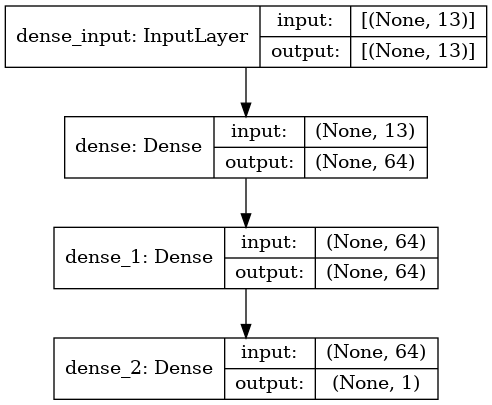

In [9]:
from tensorflow.keras import utils

model = build_model()

utils.plot_model(model, show_shapes=True)

In [10]:


check_point_cb = callbacks.ModelCheckpoint('boston_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)


history = model.fit(train_data, train_labels, 
                    validation_data=(test_data, test_labels),
                    callbacks=[check_point_cb, early_stopping_cb],
                    epochs=80, batch_size=16, verbose=0)


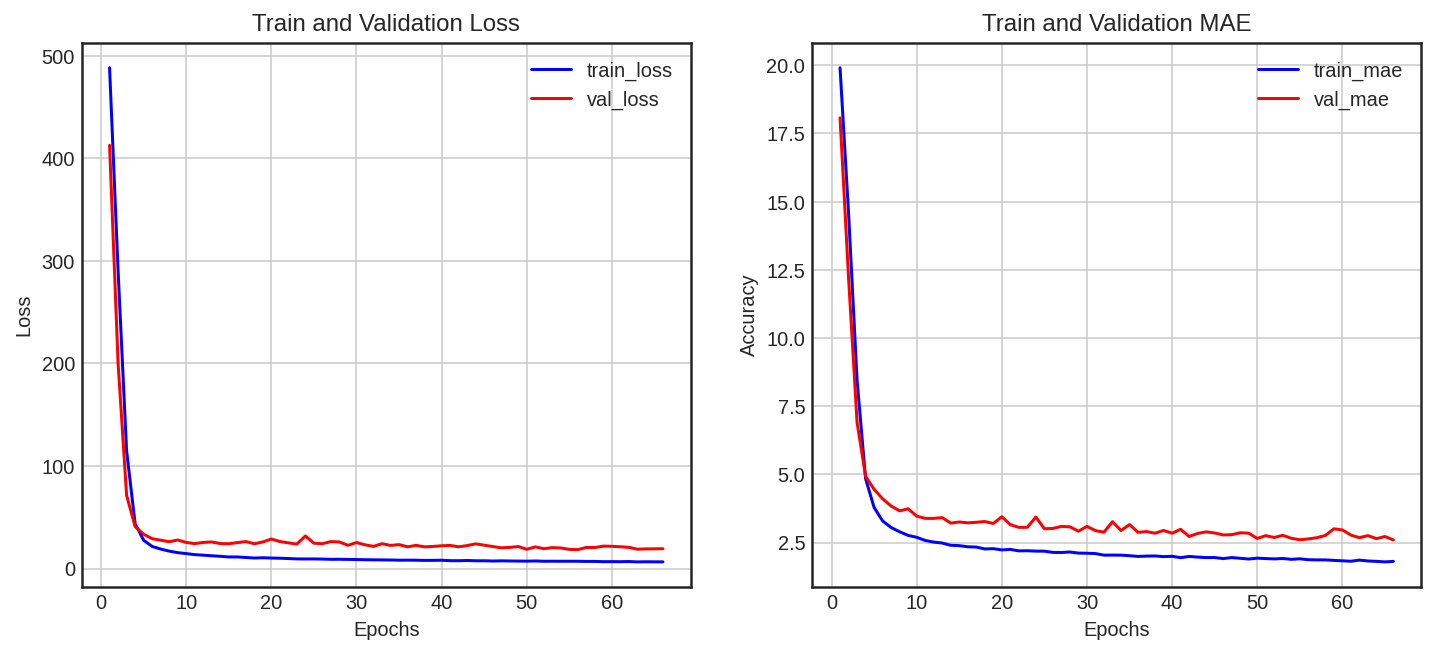

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_format = 'retina'

# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [12]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 2ms/step - loss: 18.4477 - mae: 2.6348


[18.447729110717773, 2.634807586669922]

In [13]:
from sklearn.metrics import r2_score
pred_y = model.predict(test_data)
r2_score(test_labels, pred_y)

0.7783892750766012

### Reuters

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import reuters

In [15]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.25)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2121728/2110848 [==============================] - 0s 0us/step
6736
2246
2246
46


In [16]:
# 원-핫 인코딩

def one_hot_encoding(data, dim=10000):
    results = np.zeros((len(data), dim))
    for i, d in enumerate(data):
        results[i, d] = 1.
    return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

print(x_train[0])
print(x_test[0])

[0. 1. 1. ... 0. 0. 0.]
[0. 1. 1. ... 0. 0. 0.]


In [17]:
# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환
y_train = utils.to_categorical(train_labels)
y_val = utils.to_categorical(val_labels)
y_test = utils.to_categorical(test_labels)

In [18]:
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(6736, 10000) (6736, 46) (2246, 10000) (2246, 46) (2246, 10000) (2246, 46)


In [19]:
def build_model_re():
    model = models.Sequential()
    model.add(layers.Dense(65, activation='relu', input_shape=(10000,)))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(46, activation='softmax'))
    model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [20]:
model = build_model_re()

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 65)                650065    
_________________________________________________________________
batch_normalization (BatchNo (None, 65)                260       
_________________________________________________________________
dropout (Dropout)            (None, 65)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4224      
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 46)               

In [21]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [22]:
heck_point_cb = callbacks.ModelCheckpoint('reuters_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
14/14 [==============================] - 1s 45ms/step - loss: 3.1545 - accuracy: 0.3201 - val_loss: 3.4025 - val_accuracy: 0.6474
Epoch 2/60
14/14 [==============================] - 0s 16ms/step - loss: 2.0936 - accuracy: 0.5610 - val_loss: 3.1272 - val_accuracy: 0.6990
Epoch 3/60
14/14 [==============================] - 0s 16ms/step - loss: 1.6916 - accuracy: 0.6471 - val_loss: 2.8951 - val_accuracy: 0.7106
Epoch 4/60
14/14 [==============================] - 0s 16ms/step - loss: 1.4386 - accuracy: 0.6949 - val_loss: 2.6682 - val_accuracy: 0.7150
Epoch 5/60
14/14 [==============================] - 0s 14ms/step - loss: 1.2675 - accuracy: 0.7294 - val_loss: 2.4477 - val_accuracy: 0.7159
Epoch 6/60
14/14 [==============================] - 0s 15ms/step - loss: 1.1317 - accuracy: 0.7559 - val_loss: 2.2694 - val_accuracy: 0.7217
Epoch 7/60
14/14 [==============================] - 0s 17ms/step - loss: 1.0273 - accuracy: 0.7735 - val_loss: 2.1501 - val_accuracy: 0.7084
Epoch 8/60
14

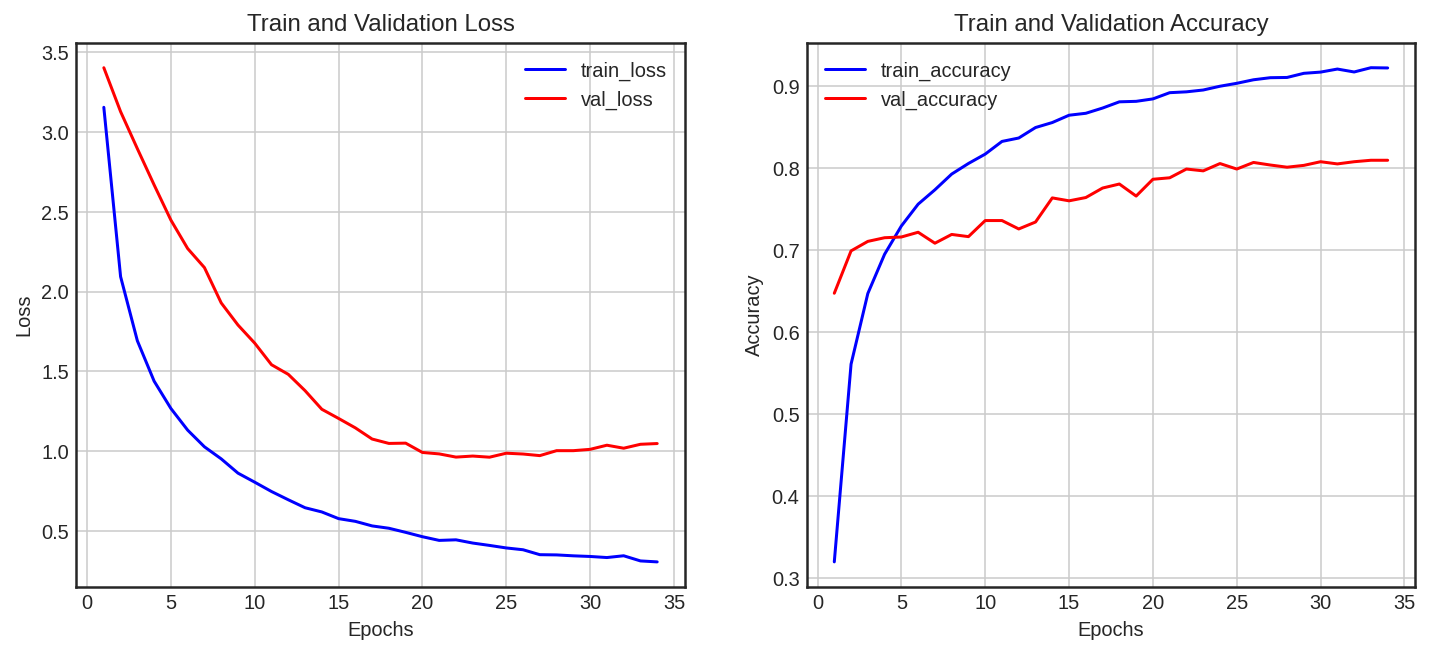

In [24]:
# 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [25]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 3ms/step - loss: 1.0587 - accuracy: 0.7765


[1.0587469339370728, 0.7764915227890015]

### CIFAR10

In [26]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [27]:
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full,
                                                  test_size=0.3,
                                                  random_state=123)

print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))

전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (35000, 32, 32, 3) 레이블: (35000, 1)
검증 데이터: (15000, 32, 32, 3) 레이블: (15000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


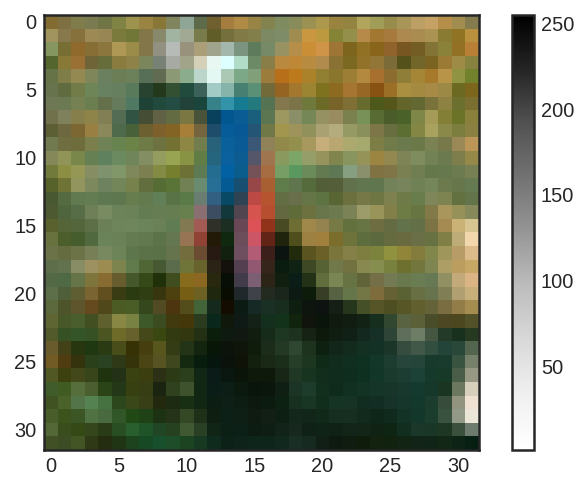

In [28]:
plt.style.use('seaborn-white')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [29]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(35000, 32, 32, 3)
(15000, 32, 32, 3)
(10000, 32, 32, 3)


In [30]:
x_train = x_train.reshape(x_train.shape[0], -1)
x_val = x_val.reshape(x_val.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# 변형된 데이터셋의 차원 출력
print("변형된 학습 데이터: {}".format(x_train.shape))
print("변형된 검증 데이터: {}".format(x_val.shape))
print("변형된 테스트 데이터: {}".format(x_test.shape))


print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

변형된 학습 데이터: (35000, 3072)
변형된 검증 데이터: (15000, 3072)
변형된 테스트 데이터: (10000, 3072)
(35000, 3072)
(15000, 3072)
(10000, 3072)


In [31]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

In [32]:
model = models.Sequential()
model.add(layers.Input(shape=(3072,), name='input'))
model.add(layers.Dense(512, kernel_regularizer='l2'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Activation('relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
             optimizer='SGD',
             metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 512)               1573376   
_________________________________________________________________
batch_normalization_2 (Batch (None, 512)               2048      
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 1,580,554
Trainable params: 1,579,530
Non-trainable params: 1,024
_________________________________________________________________


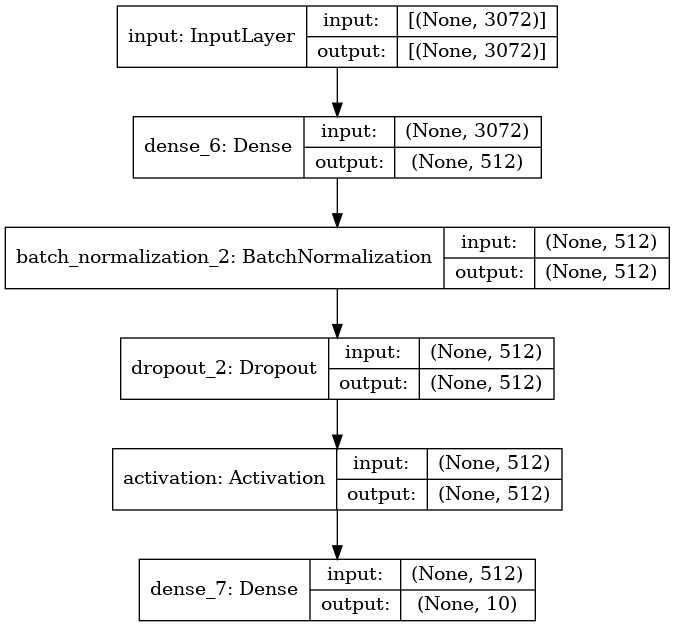

In [33]:
utils.plot_model(model, show_shapes=True)

In [36]:
heck_point_cb = callbacks.ModelCheckpoint('cifar10_model.h5', 
                                           save_best_only=True)
early_stopping_cb = callbacks.EarlyStopping(patience=10, 
                                            monitor='val_loss',
                                            restore_best_weights=True)

history = model.fit(x_train, y_train,
                    epochs=60,
                    batch_size=256,
                    validation_data=(x_val, y_val),
                    callbacks=[check_point_cb, early_stopping_cb])

Epoch 1/60
137/137 [==============================] - 1s 8ms/step - loss: 2.9435 - accuracy: 0.5490 - val_loss: 3.1478 - val_accuracy: 0.4665
Epoch 2/60
137/137 [==============================] - 1s 5ms/step - loss: 2.8667 - accuracy: 0.5512 - val_loss: 3.0466 - val_accuracy: 0.4652
Epoch 3/60
137/137 [==============================] - 1s 5ms/step - loss: 2.7775 - accuracy: 0.5538 - val_loss: 3.1031 - val_accuracy: 0.4310
Epoch 4/60
137/137 [==============================] - 1s 5ms/step - loss: 2.6919 - accuracy: 0.5545 - val_loss: 2.8723 - val_accuracy: 0.4853
Epoch 5/60
137/137 [==============================] - 1s 5ms/step - loss: 2.6167 - accuracy: 0.5571 - val_loss: 2.8647 - val_accuracy: 0.4531
Epoch 6/60
137/137 [==============================] - 1s 5ms/step - loss: 2.5403 - accuracy: 0.5607 - val_loss: 2.8461 - val_accuracy: 0.4411
Epoch 7/60
137/137 [==============================] - 1s 5ms/step - loss: 2.4729 - accuracy: 0.5617 - val_loss: 2.8521 - val_accuracy: 0.4224
Epoch 

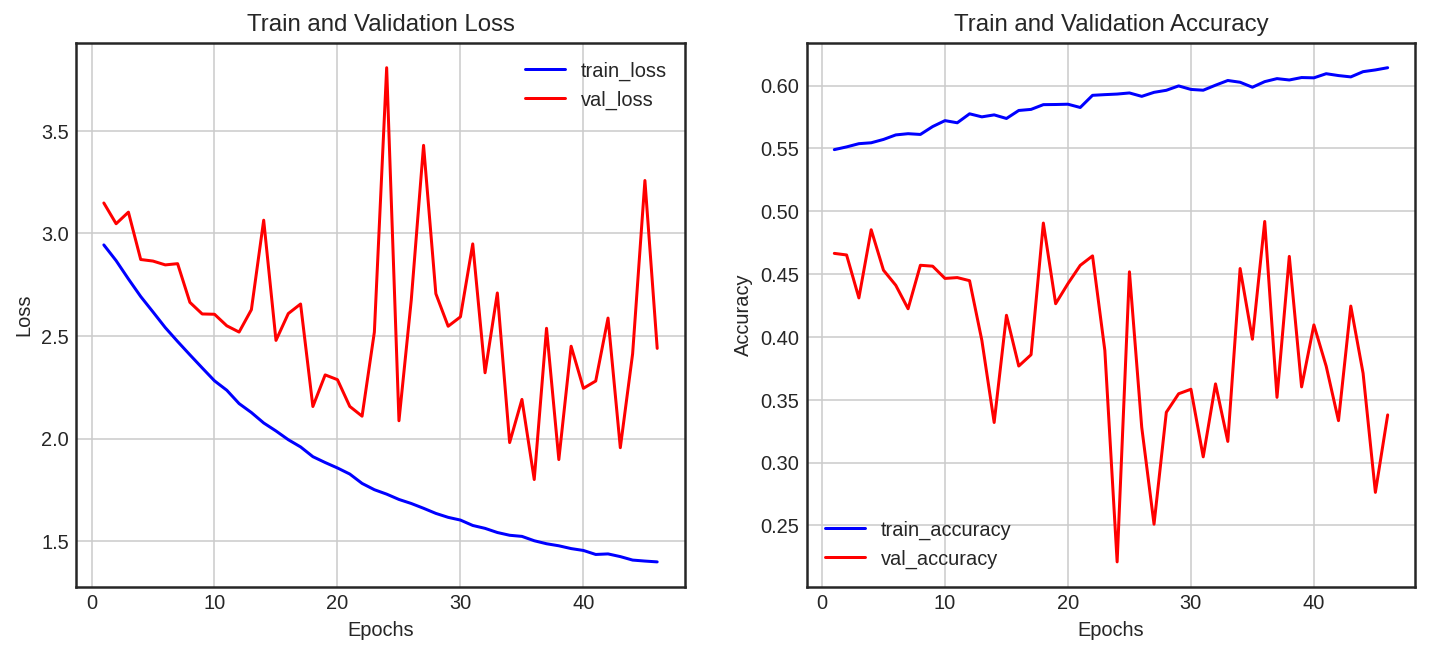

In [37]:
plt.style.use('seaborn-white')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [38]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.8107 - accuracy: 0.4781


[1.810694932937622, 0.4781000018119812]

### 회고
- 이미지 학습을 진행을 해보니 좀 더 다양하고 많은양의 이미지를 학습해보고 싶어집니다.
- 다른 모델들을 사용하여 성능을 한 번 향상시켜 보고싶습니다.